In [3]:
import os
import cv2
import glob
import time
import mmcv
import json
import datetime
import numpy as np
import argparse
import matplotlib.pyplot as plt
from pycocotools import mask
import setproctitle
from common_utils.mask_utils import mask2polygon, segm2json, xyxy2xywh
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

INFO = {
    "description": "SEE Masks",
    "url": "",
    "version": "0.1.0",
    "year": 2021,
    "contributor": "darrenjkt",
    "date_created": datetime.datetime.utcnow().isoformat(' ')
}

LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 0,
        'name': 'person',
        'supercategory': 'person',
    },
    {
        'id': 1,
        'name': 'bicycle',
        'supercategory': 'vehicle',
    },
    {
        'id': 2,
        'name': 'car',
        'supercategory': 'vehicle',
    },
    {
        'id': 3,
        'name': 'motorcycle',
        'supercategory': 'vehicle',
    },
    {
        'id': 5,
        'name': 'bus',
        'supercategory': 'vehicle',
    },
    {
        'id': 6,
        'name': 'train',
        'supercategory': 'vehicle',
    },
    {
        'id': 7,
        'name': 'truck',
        'supercategory': 'vehicle',
    }
]

def create_image_info(image_id, file_name, image_size, 
                      date_captured=datetime.datetime.utcnow().isoformat(' ')):

    image_info = {
            "id": image_id,
            "file_name": file_name,
            "width": image_size[1],
            "height": image_size[0],
            "date_captured": date_captured,
    }

    return image_info

coco_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

class Args:
    config = "/SEE-MTDA/see/mmdetection/configs/htc/htc_x101_64x4d_fpn_dconv_c3-c5_mstrain_400_1400_16x1_20e_coco.py"
    checkpoint = "/SEE-MTDA/model_zoo/htc_x101_64x4d_fpn_dconv_c3-c5_mstrain_400_1400_16x1_20e_coco_20200312-946fd751.pth"
    data_dir = "/SEE-MTDA/data/kitti/training/image_2"
    output_json = "/SEE-MTDA/data/kitti/training/masks/htc/image_2"

# https://github.com/open-mmlab/mmdetection/blob/master/configs/yolox/yolox_x_8x8_300e_coco.py
    
args = Args()

img_list = sorted(glob.glob(args.data_dir + "/*"))
print(f'Found {len(img_list)} images in {args.data_dir}')
# model = init_detector(args.config, args.checkpoint, device='cuda:0')
# instance_id = 0
# class_ids = [c['id'] for c in CATEGORIES]

Found 7481 images in /SEE-MTDA/data/kitti/training/image_2


In [3]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

config_file = '/SEE-MTDA/see/mmdetection/configs/yolox/yolox_x_8x8_300e_coco.py'
checkpoint_file = '/SEE-MTDA/model_zoo/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'


# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /SEE-MTDA/model_zoo/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


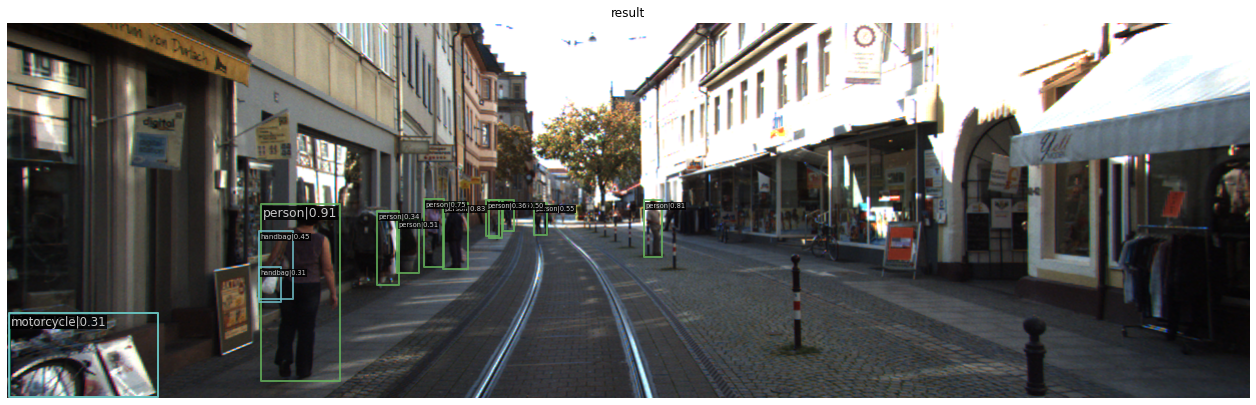

In [18]:
# test a single image
img = mmcv.imread(img_list[5258])
# img = 'demo.jpg'
result = inference_detector(model, img)

show_result_pyplot(model, img, result)

In [4]:
with open('/SEE-MTDA/see/common_utils/categories.json', 'w') as f:
    json.dump(CATEGORIES, f)

In [1]:
import json

with open('/SEE-MTDA/see/common_utils/categories.json','r') as f:
    cat = json.loads(f.read())

In [2]:
cat

[{'id': 0, 'name': 'person', 'supercategory': 'person'},
 {'id': 1, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 2, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'truck', 'supercategory': 'vehicle'}]

In [57]:
segm_json_result = segm2json(result, list(range(0,80)), score_thresh=0.1, mask=False)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [56]:
segm_json_result

[{'category_id': 0,
  'bbox': [253.42991638183594,
   181.38787841796875,
   78.59318542480469,
   177.06790161132812],
  'score': 0.9085092544555664},
 {'category_id': 0,
  'bbox': [435.0776062011719,
   180.3143768310547,
   25.845306396484375,
   66.29458618164062],
  'score': 0.829918384552002},
 {'category_id': 0,
  'bbox': [636.8076171875,
   177.01583862304688,
   18.169921875,
   57.18524169921875],
  'score': 0.8058083653450012},
 {'category_id': 0,
  'bbox': [416.0286560058594,
   176.8007354736328,
   20.8931884765625,
   67.60409545898438],
  'score': 0.748357892036438},
 {'category_id': 0,
  'bbox': [526.5119018554688,
   180.57327270507812,
   12.85394287109375,
   31.7322998046875],
  'score': 0.5525549650192261},
 {'category_id': 0,
  'bbox': [389.9383544921875,
   196.9901580810547,
   21.36566162109375,
   53.61228942871094],
  'score': 0.511062741279602},
 {'category_id': 0,
  'bbox': [495.1327209472656,
   177.39552307128906,
   10.87005615234375,
   30.783721923828

In [3]:
for idx, imgname in enumerate(img_list):        
    tic = time.time()
    num_images = len(img_list)        
    setproctitle.setproctitle(f'Masks:{idx/num_images*100:4.3}%')

    # Read image and create image_infos
    img = mmcv.imread(imgname)
    # Get segmentation mask
    result = inference_detector(model, img)
    segm_json_result = segm2json(result, class_ids, score_thresh=0.3)
    num_predicted = len(segm_json_result)
    break

/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [5]:
segm_json_result[0]

{'category_id': 0,
 'bbox': [713.2767333984375,
  150.7246856689453,
  95.412109375,
  158.2196502685547],
 'score': 0.999194324016571,
 'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

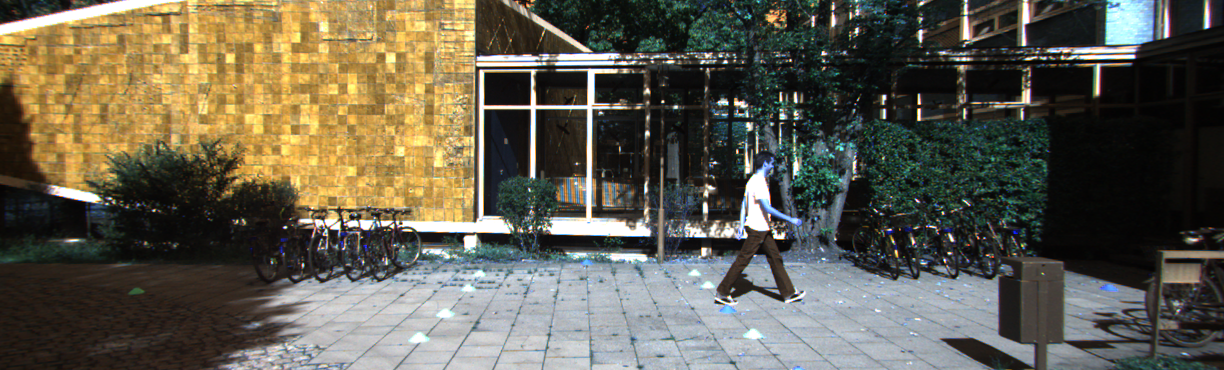

In [26]:
from PIL import Image

im = Image.fromarray(np.uint8(img))
im